<a href="https://colab.research.google.com/github/PraljakReps/UChicago_AIplusScience_code_workshops/blob/main/2023_AI%2BScienceSummerSchool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q mdtraj nglview
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 74.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 52.2 MB/s eta 0:00:00


In [2]:
# download data....
#!wget https://pdbbind.oss-cn-hangzhou.aliyuncs.com/download/PDBbind_v2020_refined.tar.gz
!wget https://pdbbind.oss-cn-hangzhou.aliyuncs.com/download/PDBbind_v2020_other_PL.tar.gz


--2023-07-04 18:33:53--  https://pdbbind.oss-cn-hangzhou.aliyuncs.com/download/PDBbind_v2020_refined.tar.gz
Resolving pdbbind.oss-cn-hangzhou.aliyuncs.com (pdbbind.oss-cn-hangzhou.aliyuncs.com)... 47.110.23.14
Connecting to pdbbind.oss-cn-hangzhou.aliyuncs.com (pdbbind.oss-cn-hangzhou.aliyuncs.com)|47.110.23.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 690895072 (659M) [application/gzip]
Saving to: ‘PDBbind_v2020_refined.tar.gz’

PDBbind_v2020_refin 100%[===================>] 658.89M  14.0MB/s    in 41s     

2023-07-04 18:34:34 (16.2 MB/s) - ‘PDBbind_v2020_refined.tar.gz’ saved [690895072/690895072]

--2023-07-04 18:34:34--  https://pdbbind.oss-cn-hangzhou.aliyuncs.com/download/PDBbind_v2020_other_PL.tar.gz
Resolving pdbbind.oss-cn-hangzhou.aliyuncs.com (pdbbind.oss-cn-hangzhou.aliyuncs.com)... 47.110.23.14
Connecting to pdbbind.oss-cn-hangzhou.aliyuncs.com (pdbbind.oss-cn-hangzhou.aliyuncs.com)|47.110.23.14|:443... connected.
HTTP request sent, awaitin

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# download spreadsheet information
!wget https://pdbbind.oss-cn-hangzhou.aliyuncs.com/download/PDBbind_v2020_plain_text_index.tar.gz
!tar -xvzf PDBbind_v2020_plain_text_index.tar.gz

--2023-07-04 18:36:44--  https://pdbbind.oss-cn-hangzhou.aliyuncs.com/download/PDBbind_v2020_plain_text_index.tar.gz
Resolving pdbbind.oss-cn-hangzhou.aliyuncs.com (pdbbind.oss-cn-hangzhou.aliyuncs.com)... 47.110.23.14
Connecting to pdbbind.oss-cn-hangzhou.aliyuncs.com (pdbbind.oss-cn-hangzhou.aliyuncs.com)|47.110.23.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3231607 (3.1M) [application/gzip]
Saving to: ‘PDBbind_v2020_plain_text_index.tar.gz’

PDBbind_v2020_plain 100%[===================>]   3.08M  5.96MB/s    in 0.5s    

2023-07-04 18:36:45 (5.96 MB/s) - ‘PDBbind_v2020_plain_text_index.tar.gz’ saved [3231607/3231607]



In [5]:
# download and prepare datasets...
!mkdir /content/v2020

!tar -xvzf PDBbind_v2020_other_PL.tar.gz -C /content/v2020
#!tar -xvzf PDBbind_v2020_refined.tar.gz -C /content/v2020

# move all structure information into one folder...
#!cp -r /content/v2020/refined-set /content/v2020/all # TODO: delete refined-set and v2020-other-PL after copying to save memory
#!cp -r /content/v2020/v2020-other-PL /content/v2020/all

Streaming output truncated to the last 5000 lines.
refined-set/1fkh/1fkh_pocket.pdb
refined-set/1fkh/1fkh_ligand.sdf
refined-set/1fkh/1fkh_ligand.mol2
refined-set/2f8g/
refined-set/2f8g/2f8g_ligand.mol2
refined-set/2f8g/2f8g_pocket.pdb
refined-set/2f8g/2f8g_ligand.sdf
refined-set/2f8g/2f8g_protein.pdb
refined-set/6elp/
refined-set/6elp/6elp_ligand.mol2
refined-set/6elp/6elp_pocket.pdb
refined-set/6elp/6elp_protein.pdb
refined-set/6elp/6elp_ligand.sdf
refined-set/4v27/
refined-set/4v27/4v27_ligand.sdf
refined-set/4v27/4v27_pocket.pdb
refined-set/4v27/4v27_ligand.mol2
refined-set/4v27/4v27_protein.pdb
refined-set/5fsc/
refined-set/5fsc/5fsc_protein.pdb
refined-set/5fsc/5fsc_ligand.sdf
refined-set/5fsc/5fsc_ligand.mol2
refined-set/5fsc/5fsc_pocket.pdb
refined-set/1fh8/
refined-set/1fh8/1fh8_ligand.sdf
refined-set/1fh8/1fh8_pocket.pdb
refined-set/1fh8/1fh8_ligand.mol2
refined-set/1fh8/1fh8_protein.pdb
refined-set/3gnw/
refined-set/3gnw/3gnw_protein.pdb
refined-set/3gnw/3gnw_pocket.pdb
refi

In [57]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from rdkit import Chem
import mdtraj as md

from google.colab import output
output.enable_custom_widget_manager()

In [149]:

fields

['2avi', '3.00', '1993', '15.22', 'Kd=0.6fM', '//', '2avi.pdf', '(BTN)']

In [88]:
import pandas as pd

with open('./index/INDEX_general_PL_data.2020', 'r') as file:
  lines = file.readlines()

data = []
for line in lines[6:]:
    line = line.strip()
    fields = line.split()

    pdb_code = fields[0]
    resolution = fields[1]
    release_year = fields[2]
    binding_data = fields[3]
    affinity_measurement = fields[4]

    data.append([pdb_code, resolution, release_year, binding_data, affinity_measurement])

columns = ["PDB code", "resolution", "release year", "binding data", "exp_measurement"]
df = pd.DataFrame(data, columns=columns)
pdb_list = os.listdir('/content/v2020/v2020-other-PL/') # get the pdb complexes that are found in the v2020-other-PL folder...
df = df[df['PDB code'].isin(pdb_list)] # only use complexes that are found in the v2020-other-PL folder...


In [89]:
# Kd (dissociation Constant) datasheet
Kd_df = df[
    df['exp_measurement'].str.contains('Kd')
].reset_index(drop=True)

# Ki (Inhibition Constant) datasheet
Ki_df = df[
    df['exp_measurement'].str.contains('Ki')
].reset_index(drop=True)

# IC50 datasheet
IC50_df = df[
    df['exp_measurement'].str.contains('IC50')
].reset_index(drop=True)

print('Datasheet corresponding to protein-ligand complexes with (Kd) dissociation constants.')
display(Kd_df.head(3))
print('\n\nDatasheet corresponding to protein-ligand complexes with (Ki) Inhibition constants.')
display(Ki_df.head(3))
print('\n\nDatasheet corresponding to protein-ligand complexes with (IC50) Half-Maximal Inhibitory Concentration.')
display(IC50_df.head(3))


Datasheet corresponding to protein-ligand complexes with (Kd) dissociation constants.


,PDB code,resolution,release year,binding data,exp_measurement
0,1zsb,2.00,1996,0.60,Kd=250mM
1,6h9v,1.52,2019,0.66,Kd=220mM
2,3k41,1.90,2009,0.82,Kd=150mM




Datasheet corresponding to protein-ligand complexes with (Ki) Inhibition constants.


,PDB code,resolution,release year,binding data,exp_measurement
0,3zzf,2.20,2012,0.40,Ki=400mM
1,1w8l,1.80,2004,0.49,Ki=320mM
2,4obv,2.84,2014,0.75,Ki=178mM




Datasheet corresponding to protein-ligand complexes with (IC50) Half-Maximal Inhibitory Concentration.


,PDB code,resolution,release year,binding data,exp_measurement
0,3gww,2.46,2009,0.45,IC50=355mM
1,3fqa,2.35,2009,0.49,IC50=320mM
2,3fl9,2.40,2009,1.11,IC50=77.2mM


In [90]:
def add_molecule_data_paths(df: pd.Series):

  data_path_dict = {
      'ligand_mol_paths': [],
      'ligand_sdf_paths': [],
      'pocket_paths': [],
      'protein_pdb_paths': []
  }
  for pdb_id in tqdm(df['PDB code']):

    pdb_path = f'/content/v2020/v2020-other-PL/{pdb_id}/{pdb_id}_'

    # track data paths
    data_path_dict['ligand_mol_paths'].append( pdb_path + 'ligand.mol2' )
    data_path_dict['ligand_sdf_paths'].append( pdb_path + 'ligand.sdf' )
    data_path_dict['pocket_paths'].append( pdb_path + 'pocket.pdb' )
    data_path_dict['protein_pdb_paths'].append( pdb_path + 'protein.pdb' )

  data_path_df = pd.DataFrame(data_path_dict)

  # return the final appended dataframe
  return pd.concat((df, data_path_df), axis=1)

# attach the protein, ligand data paths

Kd_df = add_molecule_data_paths(df=Kd_df)
Ki_df = add_molecule_data_paths(df=Ki_df)
IC50_df = add_molecule_data_paths(df=IC50_df)

100%|██████████| 7190/7190 [00:00<00:00, 942319.34it/s]


In [91]:

# Visualize the added columns that point the protein, ligand sequence/structure data paths...
print('Dataframe corresponding to the protein-ligand compex dataframe with (Kd) dissociation constants.')
display(Kd_df.head(3))
print('\n\nDataframe corresponding to the protein-ligand compex dataframe with (Ki) Inhibition constants.')
display(Ki_df.head(3))
print('\n\nDataframe corresponding to the protein-ligand compex dataframe with (IC50) Half-Maximal Inhibitory Concentration.')
display(IC50_df.head(3))


Dataframe corresponding to the protein-ligand compex dataframe with (Kd) dissociation constants.


,PDB code,resolution,release year,binding data,exp_measurement,ligand_mol_paths,ligand_sdf_paths,pocket_paths,protein_pdb_paths
0,1zsb,2.00,1996,0.60,Kd=250mM,/content/v2020/v2020-other-PL/1zsb/1zsb_ligand...,/content/v2020/v2020-other-PL/1zsb/1zsb_ligand...,/content/v2020/v2020-other-PL/1zsb/1zsb_pocket...,/content/v2020/v2020-other-PL/1zsb/1zsb_protei...
1,6h9v,1.52,2019,0.66,Kd=220mM,/content/v2020/v2020-other-PL/6h9v/6h9v_ligand...,/content/v2020/v2020-other-PL/6h9v/6h9v_ligand...,/content/v2020/v2020-other-PL/6h9v/6h9v_pocket...,/content/v2020/v2020-other-PL/6h9v/6h9v_protei...
2,3k41,1.90,2009,0.82,Kd=150mM,/content/v2020/v2020-other-PL/3k41/3k41_ligand...,/content/v2020/v2020-other-PL/3k41/3k41_ligand...,/content/v2020/v2020-other-PL/3k41/3k41_pocket...,/content/v2020/v2020-other-PL/3k41/3k41_protei...




Dataframe corresponding to the protein-ligand compex dataframe with (Ki) Inhibition constants.


,PDB code,resolution,release year,binding data,exp_measurement,ligand_mol_paths,ligand_sdf_paths,pocket_paths,protein_pdb_paths
0,3zzf,2.20,2012,0.40,Ki=400mM,/content/v2020/v2020-other-PL/3zzf/3zzf_ligand...,/content/v2020/v2020-other-PL/3zzf/3zzf_ligand...,/content/v2020/v2020-other-PL/3zzf/3zzf_pocket...,/content/v2020/v2020-other-PL/3zzf/3zzf_protei...
1,1w8l,1.80,2004,0.49,Ki=320mM,/content/v2020/v2020-other-PL/1w8l/1w8l_ligand...,/content/v2020/v2020-other-PL/1w8l/1w8l_ligand...,/content/v2020/v2020-other-PL/1w8l/1w8l_pocket...,/content/v2020/v2020-other-PL/1w8l/1w8l_protei...
2,4obv,2.84,2014,0.75,Ki=178mM,/content/v2020/v2020-other-PL/4obv/4obv_ligand...,/content/v2020/v2020-other-PL/4obv/4obv_ligand...,/content/v2020/v2020-other-PL/4obv/4obv_pocket...,/content/v2020/v2020-other-PL/4obv/4obv_protei...




Dataframe corresponding to the protein-ligand compex dataframe with (IC50) Half-Maximal Inhibitory Concentration.


,PDB code,resolution,release year,binding data,exp_measurement,ligand_mol_paths,ligand_sdf_paths,pocket_paths,protein_pdb_paths
0,3gww,2.46,2009,0.45,IC50=355mM,/content/v2020/v2020-other-PL/3gww/3gww_ligand...,/content/v2020/v2020-other-PL/3gww/3gww_ligand...,/content/v2020/v2020-other-PL/3gww/3gww_pocket...,/content/v2020/v2020-other-PL/3gww/3gww_protei...
1,3fqa,2.35,2009,0.49,IC50=320mM,/content/v2020/v2020-other-PL/3fqa/3fqa_ligand...,/content/v2020/v2020-other-PL/3fqa/3fqa_ligand...,/content/v2020/v2020-other-PL/3fqa/3fqa_pocket...,/content/v2020/v2020-other-PL/3fqa/3fqa_protei...
2,3fl9,2.40,2009,1.11,IC50=77.2mM,/content/v2020/v2020-other-PL/3fl9/3fl9_ligand...,/content/v2020/v2020-other-PL/3fl9/3fl9_ligand...,/content/v2020/v2020-other-PL/3fl9/3fl9_pocket...,/content/v2020/v2020-other-PL/3fl9/3fl9_protei...


In [170]:

def get_protein_and_ligand_sequence(df: pd.Series, source: str='Train') -> pd.Series:

  sequence_dict = {
      'protein_sequence': [],
      'ligand_smiles': []
  }

  print(f'{source} dataset: Retrieve and prepare protein sequences and ligand smile sequences')
  for protein_pdb_path, ligand_sdf_path in tqdm(zip(df['protein_pdb_paths'], df['ligand_sdf_paths'])):
    # load the protein sequences
    protein_mdtraj = md.load_pdb(protein_pdb_path) # Protein PDB complex
    # Get the topology object associated with the protein structure
    topology = protein_mdtraj.topology
    # Retrieve the protein sequence
    protein_sequence = topology.to_fasta()[0]

    # load the smiles strings
    suppl = Chem.SDMolSupplier(ligand_sdf_path) # RDkit moleule copmles
    # retrieve molecule
    smiles_ligand_sequences = []
    for mol in suppl:
        if mol is not None:  # Check if molecule was read successfully
            # convert molecule to smiles string
            smiles_ligand_sequences.append(Chem.MolToSmiles(mol))


    sequence_dict['protein_sequence'].append(protein_sequence)
    if smiles_ligand_sequences:# list is not empty
      sequence_dict['ligand_smiles'].append(smiles_ligand_sequences[0])
    else: # list is empty
      sequence_dict['ligand_smiles'].append('NaN')

  seq_df = pd.DataFrame(sequence_dict)
  return pd.concat((df, seq_df), axis=1)


In [168]:
final_Kd_df.shape

(4466, 11)

In [171]:
final_Kd_df = get_protein_and_ligand_sequence(Kd_df, source='Kd')
final_Ki_df = get_protein_and_ligand_sequence(Ki_df, source='Ki')
final_IC50_df = get_protein_and_ligand_sequence(IC50_df, source='IC50')

Kd dataset: Retrieve and prepare protein sequences and ligand smile sequences


0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM 6049  O   HOH   373       0.150 -10.039  24.274  1.00 44.32           O  , HETATM 6048  OXT IAS   373      -4.199   2.204  36.155  1.00 59.12           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
808it [02:30,  9.68it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM22870  O   HOH   378      41.426 -16.863 -10.534  1.00 27.60           O  , HETATM22869  OD2 CSD   378      19.536  20.226   8.517  1.00 24.66           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
2031it [05:40,  8.55it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.p

Ki dataset: Retrieve and prepare protein sequences and ligand smile sequences


492it [02:34,  4.36it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM25443  O   HOH    67     -58.814   5.883  69.647  1.00 31.24           O  , HETATM25442  OXT IAS    67     -31.063 -40.423 120.292  1.00 27.13           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
1255it [05:35,  7.02it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM 3225  O   HOH    25     -19.465  19.257  13.219  1.00 32.94           O  , HETATM 3224  OD2 CSD    25     -17.219   3.687  10.161  1.00 24.51           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
1475it [06:20,  6.24it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstru

IC50 dataset: Retrieve and prepare protein sequences and ligand smile sequences


1132it [04:03,  4.51it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM 6411  O   HOH    67      -8.645 -24.402-143.211  1.00 27.05           O  , HETATM 6410  OXT IAS    67       2.733 -28.232-105.953  1.00 43.86           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
1965it [06:43,  5.03it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM 7000  O   HOH    10     -13.766 -20.331  -9.456  1.00 21.54           O  , HETATM 6999  OD2 CSD    10       1.083  12.808 -38.269  1.00 38.17           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
7190it [22:47,  5.26it/s]


In [175]:
final_Kd_df.drop('Kd_values[uM]', axis=1, inplace=True)
final_Ki_df.drop('Ki_values[uM]', axis=1, inplace=True)
final_IC50_df.drop('IC50_values[uM]', axis=1, inplace=True)

In [176]:


final_Kd_df.to_csv(
    '/content/drive/MyDrive/AIplusScience_SummerSchool/final_Kd_dataframe.csv',
    index=False
    )
final_Ki_df.to_csv(
    '/content/drive/MyDrive/AIplusScience_SummerSchool/final_Ki_dataframe.csv',
    index=False
)
final_IC50_df.to_csv(
    '/content/drive/MyDrive/AIplusScience_SummerSchool/final_IC50_dataframe.csv',
    index=False
)


In [157]:
final_Kd_df.shape, final_Ki_df.shape, final_IC50_df.shape

((4466, 12), (3572, 12), (7190, 12))

In [92]:
import re

def convert_unit_to_value(value: str) -> float:

  # Define a dictionary of conversion factors for different units
  conversion_factors = {
      'M': 1.0,
      'mM':1e-3,
      'uM':1e-6,
      'nM': 1e-9,
      'pM': 1e-12,
      'fM': 1e-15
  }

  # Extract the numerical value and unit
  numerical_value, unit = re.findall(r'(\d+(?:\.\d+)?)\s*([a-zA-Z]+)', value)[0] # e.g. spit kd=255nM into ('255', 'nM').

  # apply the conversion factor from the dictionary
  converted_value = float(numerical_value) * conversion_factors[unit]
  return converted_value / conversion_factors['uM']

In [93]:
# convert string-based experimental measurements into
Kd_df['Kd_values[uM]'] = [convert_unit_to_value(value) for value in Kd_df['exp_measurement']]
Ki_df['Ki_values[uM]'] = [convert_unit_to_value(value) for value in Ki_df['exp_measurement']]
IC50_df['IC50_values[uM]'] = [convert_unit_to_value(value) for value in IC50_df['exp_measurement']]


In [94]:
# display the dataframe columns that corresponds to the preprocess output measurements

print('Kd measurements after preprocessing...')
display(Kd_df['Kd_values[uM]'].head(3))
print('\n\nKi measurements after preprocessing...')
display(Ki_df['Ki_values[uM]'].head(3))
print('\n\nIC50 measurements after preprocessing...')
display(IC50_df['IC50_values[uM]'].head(3))


Kd measurements after preprocessing...


0    250000.0
1    220000.0
2    150000.0
Name: Kd_values[uM], dtype: float64



Ki measurements after preprocessing...


0    400000.0
1    320000.0
2    178000.0
Name: Ki_values[uM], dtype: float64



IC50 measurements after preprocessing...


0    355000.0
1    320000.0
2     77200.0
Name: IC50_values[uM], dtype: float64

In [95]:
from sklearn.model_selection import train_test_split

# split the Kd dataframe into a train/test split:
train_Kd_df, test_Kd_df = train_test_split(Kd_df, test_size=0.2, random_state=42)

print('Training and testing dataset sizes:', train_Kd_df.shape[0], test_Kd_df.shape[0])

Training and testing dataset sizes: 3572 894


In [96]:
def normalize_values(values: np.single, min: float, max: float) -> list:
  return (values - min) / (max-min)

# normalize the training and test experimental measurements based on the training set statistics
train_Kd_df['norm_Kd_values'] = normalize_values(
    values=train_Kd_df['Kd_values[uM]'].values,
    min=min(train_Kd_df['Kd_values[uM]'].values.tolist()),
    max=max(train_Kd_df['Kd_values[uM]'].values.tolist())

    )
# we want to take the logarithm of the normalized Kd measurements to reduce the dynamic range
train_Kd_df['log_norm_Kd'] = np.log10(
    train_Kd_df['norm_Kd_values'] + 1e-10
)

# Normalize the test set now...
test_Kd_df['norm_Kd_values'] = normalize_values(
    values=test_Kd_df['Kd_values[uM]'].values,
    min=min(train_Kd_df['Kd_values[uM]'].values.tolist()), # important to note... use the training set statistics
    max=max(train_Kd_df['Kd_values[uM]'].values.tolist())

    )
# we want to take the logarithm of the normalized Kd measurements to reduce the dynamic range
test_Kd_df['log_norm_Kd'] = np.log10(
    test_Kd_df['norm_Kd_values'] + 1e-10
)

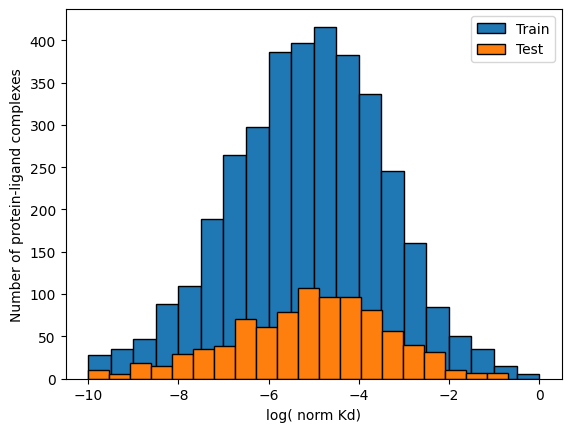

In [97]:
import matplotlib.pyplot as plt

# plot the log normalized kd measurements...
plt.hist(train_Kd_df['log_norm_Kd'].values, bins=20, edgecolor='k', label='Train')
plt.hist(test_Kd_df['log_norm_Kd'].values, bins=20, edgecolor='k', label='Test')
plt.xlabel('log( norm Kd)')
plt.ylabel('Number of protein-ligand complexes')
plt.legend()


## Preprocess the smiles string and protein sequence for each complex:

In [147]:

def get_protein_and_ligand_sequence(df: pd.Series, source: str='Train') -> pd.Series:

  sequence_dict = {
      'protein_sequence': [],
      'ligand_smiles': []
  }

  print(f'{source} dataset: Retrieve and prepare protein sequences and ligand smile sequences')
  for protein_pdb_path, ligand_sdf_path in tqdm(zip(train_Kd_df['protein_pdb_paths'], train_Kd_df['ligand_sdf_paths'])):
    # load the protein sequences
    protein_mdtraj = md.load_pdb(protein_pdb_path) # Protein PDB complex
    # Get the topology object associated with the protein structure
    topology = protein_mdtraj.topology
    # Retrieve the protein sequence
    protein_sequence = topology.to_fasta()[0]

    # load the smiles strings
    suppl = Chem.SDMolSupplier(ligand_sdf_path) # RDkit moleule copmles
    # retrieve molecule
    smiles_ligand_sequences = []
    for mol in suppl:
        if mol is not None:  # Check if molecule was read successfully
            # convert molecule to smiles string
            smiles_ligand_sequences.append(Chem.MolToSmiles(mol))


    sequence_dict['protein_sequence'].append(protein_sequence)
    if smiles_ligand_sequences:# list is not empty
      sequence_dict['ligand_smiles'].append(smiles_ligand_sequences[0])
    else: # list is empty
      sequence_dict['ligand_smiles'].append('NaN')

  seq_df = pd.DataFrame(sequence_dict)
  return pd.concat((df, seq_df), axis=1)


In [148]:
from rdkit import Chem, RDLogger
# Disable RDKit warnings
RDLogger.DisableLog('rdApp.*')
final_train_Kd_df = get_protein_and_ligand_sequence(df=train_Kd_df, source='Train')
final_test_Kd_df = get_protein_and_ligand_sequence(df=test_Kd_df, source='Test')


Train dataset: Retrieve and prepare protein sequences and ligand smile sequences


947it [02:45,  5.95it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM 2827  O   HOH   168      43.694 -38.752  14.306  1.00 13.51           O  , HETATM 2826  OXT DAL   168      28.662 -43.427   4.175  1.00 22.17           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
1675it [04:47,  6.51it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM22870  O   HOH   378      41.426 -16.863 -10.534  1.00 27.60           O  , HETATM22869  OD2 CSD   378      19.536  20.226   8.517  1.00 24.66           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
1719it [04:56,  8.76it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstru

Test dataset: Retrieve and prepare protein sequences and ligand smile sequences


947it [02:48,  5.74it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM 2827  O   HOH   168      43.694 -38.752  14.306  1.00 13.51           O  , HETATM 2826  OXT DAL   168      28.662 -43.427   4.175  1.00 22.17           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
1675it [04:52,  6.40it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (HETATM22870  O   HOH   378      41.426 -16.863 -10.534  1.00 27.60           O  , HETATM22869  OD2 CSD   378      19.536  20.226   8.517  1.00 24.66           O  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))
1719it [05:00,  8.25it/s]/usr/local/lib/python3.10/dist-packages/mdtraj/formats/pdb/pdbstru

In [150]:
final_train_Kd_df

,PDB code,resolution,release year,binding data,exp_measurement,ligand_mol_paths,ligand_sdf_paths,pocket_paths,protein_pdb_paths,Kd_values[uM],norm_Kd_values,log_norm_Kd,protein_sequence,ligand_smiles
2398,5uwi,2.14,2017,5.80,Kd=1600nM,/content/v2020/v2020-other-PL/5uwi/5uwi_ligand...,/content/v2020/v2020-other-PL/5uwi/5uwi_ligand...,/content/v2020/v2020-other-PL/5uwi/5uwi_pocket...,/content/v2020/v2020-other-PL/5uwi/5uwi_protei...,1.600,6.400000e-06,-5.193813,DKICLGHHAVSNGTKVNTLTERGVEVVNATETVERTNIPRICSKGK...,CC(=O)N[C@@H]1[C@@H](O)[C@H](O[C@@H]2O[C@H](CO...
1406,4wmx,2.00,2015,4.85,Kd=14.1uM,/content/v2020/v2020-other-PL/4wmx/4wmx_ligand...,/content/v2020/v2020-other-PL/4wmx/4wmx_ligand...,/content/v2020/v2020-other-PL/4wmx/4wmx_pocket...,/content/v2020/v2020-other-PL/4wmx/4wmx_protei...,14.100,5.640000e-05,-4.248720,DSSRRQYQEKYKQVEQYMSFHKLPPDTRQRIHDYYEHRYQGKMFDE...,Nc1ncnc2c1ncn2[C@@H]1O[C@@H]2CO[P@@](=O)(O)O[C...
3755,4or0,2.58,2014,7.46,Kd=35nM,/content/v2020/v2020-other-PL/4or0/4or0_ligand...,/content/v2020/v2020-other-PL/4or0/4or0_ligand...,/content/v2020/v2020-other-PL/4or0/4or0_pocket...,/content/v2020/v2020-other-PL/4or0/4or0_protei...,0.035,1.400000e-07,-6.853562,NaN,NaN
2600,5u4c,1.70,2017,6.00,Kd=0.99uM,/content/v2020/v2020-other-PL/5u4c/5u4c_ligand...,/content/v2020/v2020-other-PL/5u4c/5u4c_ligand...,/content/v2020/v2020-other-PL/5u4c/5u4c_pocket...,/content/v2020/v2020-other-PL/5u4c/5u4c_protei...,0.990,3.960000e-06,-5.402294,SHMKSFFDKKRSERISNGGFRPAAPNLAGAVEFSDVKTLLKEWITT...,CC(C)CC(=O)c1c(Nc2ccc(Cl)cc2Cl)[nH]c2c(Cl)ccc(...
1611,6da1,2.00,2019,5.05,Kd=9uM,/content/v2020/v2020-other-PL/6da1/6da1_ligand...,/content/v2020/v2020-other-PL/6da1/6da1_ligand...,/content/v2020/v2020-other-PL/6da1/6da1_pocket...,/content/v2020/v2020-other-PL/6da1/6da1_protei...,9.000,3.600000e-05,-4.443696,RPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKTGLRV...,Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(OCC[NH+]...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SDLIPAPPLSKVPLQQNFQDNQFHGKWYVVGAGNAILREDKDPQKM...,O=[N+]([O-])c1cccc(O)c1
3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SNVEPVGRLHIFSGAHGPEKDFPLHLGKNVVGRMPDCSVALPFPSI...,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCC(...
3551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLS...,O=C1NC(=O)[C@@H](c2ccccc2)O1
3554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EWQENKSWNAHFTEHKSQGVVVLWNENKQQGFTNNLKRANQAFLPA...,CN(C)c1cccc(-c2cccc(C(=O)O)c2)c1


In [101]:
protein_sequence

'VQFKLVLVGDGGTGKTTFVKRHLTGEFEKKYVATLGVEVHPLVFHTNRGPIKFNVWDTAGQEKFGGLRDGYYIQAQCAIIMFDVTSRVTYKNVPNWHRDLVRVCENIPIVLCGNKVDIKDRKVKAKSIVFHRKKNLQYYDISAKSNYNFEKPFLWLARKLIGDPNLEFVAMPALAPPEVVMDPALAAQYEHDLEVAQTTALPDEDDDL'

In [100]:
smiles_ligand_sequence

'CSCC[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CO)NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](C)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@@H]([NH3+])CO)[C@@H](C)O)C(C)C)C(=O)N[C@@H](C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CO)C(=O)N[C@H](C(=O)NCC(=O)O)C(C)C'

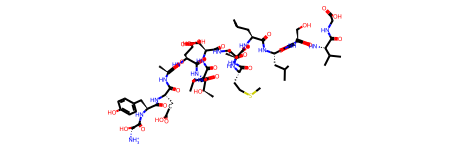

In [99]:
mol

## Visualize protein-ligand structures:

In [46]:
import mdtraj as md
import nglview
from rdkit import Chem
from rdkit.Chem import Draw

from IPython.display import display, Image

In [47]:
def get_protein_ligand_sequence(df: pd.Series) -> pd.Series:

  sequence_dict = {
      'protein_sequence': [],
      'ligand_sequence': []
  }
  for (protein_pdb_path, ligand_sdf_path) in tqdm(zip(df['protein_pdb_paths'], df['ligand_sdf_paths'])):

    protein_mdtraj = md.load_pdb(protein_pdb_path) # protein data
    ligand_suppl = Chem.SDMolSupplier(ligand_sdf_path) # ligand data

    # extract the protein sequence
    topology = protein_mdtraj.topology
    # retrieve the protein sequence
    protein_sequence = topology.to_fasta()[0]

    # extract the ligand molecule SMILE's sequence
    molecules = [mol for mol in suppl if mol is not None]
    # retrieve the SMILE's ligand sequence
    Smiles_sequence = Chem.MolToSmiles(molecules[0])

    sequence_dict['protein_sequence'].append(protein_sequence)
    sequence_dict['ligand_sequence'].append(Smiles_sequence)


  seq_df = pd.DataFrame(sequence_dict)

  return pd.concat((df, seq_df), axis=1)

In [48]:

get_protein_ligand_sequence(df=train_Kd_df)

0it [00:00, ?it/s]


FileNotFoundError: ignored

In [45]:

train_Kd_df['protein_pdb_paths'].iloc[2]

'/content/v2020-other-PL/5ect/5ect_protein.pdb'

In [46]:
protein_mdtraj = md.load_pdb(train_Kd_df['protein_pdb_paths'].iloc[2]) # Protein PDB complex
suppl = Chem.SDMolSupplier(train_Kd_df['ligand_sdf_paths'].iloc[1]) # RDkit moleule copmles


FileNotFoundError: ignored

In [21]:

topology.to_fasta()[0]

'ILGGREAEAHARPYMASVQLNGAHLCGGVLVAEQWVLSAAHCLEGKVQVLLGAHSLSQPEPSKRLYDVLRAVPHPDSQPDTIDHDLLLLQLSEKATLGPAVRPLPWQRVDRDVAPGTLCDVAGWGIVNHAGRRPDSLQHVLLPVLDRATCNRRTHHDGAITERLMCAESNRRDSCKGDSGGPLVCGGVLEGVVTSGSRVCGNRKKPGIYTRVASYAAWIDSVLASAAA'

In [22]:
# Get the topology object associated with the protein structure
topology = protein_mdtraj.topology

# Retrieve the protein sequence
protein_sequence = topology.to_fasta()[0]

In [23]:

Chem.MolToSmiles(mol)

'[NH3+]Cc1cccc(-c2cccc(C(=O)N[C@H]3CCCc4ccccc43)c2)c1'

Here is the molecule: <rdkit.Chem.rdchem.Mol object at 0x7f52bac9c9e0>


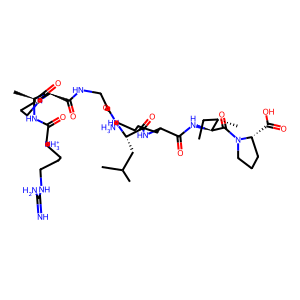

In [25]:

molecules = [mol for mol in suppl if mol is not None]

# Visualize molecules
for i, mol in enumerate(molecules):
    print('Here is the molecule:', mol)
    img = Draw.MolToImage(mol)
    img.show()

In [27]:
view = nglview.show_mdtraj(protein_mdtraj)
display(view)  # interactive view outside Colab

NGLWidget()

In [ ]:

train_Kd_df

,PDB code,resolution,release year,binding data,exp_measurement,ligand_mol_paths,ligand_sdf_paths,pocket_paths,protein_pdb_paths,Kd_values[uM],norm_Kd_values,log_norm_Kd
1965,6fut,1.50,2018,4.70,Kd=20uM,/content/v2020-other-PL/6fut/6fut_ligand.mol2,/content/v2020-other-PL/6fut/6fut_ligand.sdf,/content/v2020-other-PL/6fut/6fut_pocket.pdb,/content/v2020-other-PL/6fut/6fut_protein.pdb,20.0000,9.090909e-05,-4.041392
864,5etf,2.40,2016,3.79,Kd=161.5uM,/content/v2020-other-PL/5etf/5etf_ligand.mol2,/content/v2020-other-PL/5etf/5etf_ligand.sdf,/content/v2020-other-PL/5etf/5etf_pocket.pdb,/content/v2020-other-PL/5etf/5etf_protein.pdb,161.5000,7.340909e-04,-3.134250
2847,5ect,1.30,2016,5.28,Kd=5.2uM,/content/v2020-other-PL/5ect/5ect_ligand.mol2,/content/v2020-other-PL/5ect/5ect_ligand.sdf,/content/v2020-other-PL/5ect/5ect_pocket.pdb,/content/v2020-other-PL/5ect/5ect_protein.pdb,5.2000,2.363636e-05,-4.626417
6135,4nrk,2.63,2014,7.62,Kd=24nM,/content/v2020-other-PL/4nrk/4nrk_ligand.mol2,/content/v2020-other-PL/4nrk/4nrk_ligand.sdf,/content/v2020-other-PL/4nrk/4nrk_pocket.pdb,/content/v2020-other-PL/4nrk/4nrk_protein.pdb,0.0240,1.090909e-07,-6.961814
5413,3poa,2.01,2011,7.00,Kd=0.1uM,/content/v2020-other-PL/3poa/3poa_ligand.mol2,/content/v2020-other-PL/3poa/3poa_ligand.sdf,/content/v2020-other-PL/3poa/3poa_pocket.pdb,/content/v2020-other-PL/3poa/3poa_protein.pdb,0.1000,4.545455e-07,-6.342327
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,4xkc,2.00,2015,5.87,Kd=1.36uM,/content/v2020-other-PL/4xkc/4xkc_ligand.mol2,/content/v2020-other-PL/4xkc/4xkc_ligand.sdf,/content/v2020-other-PL/4xkc/4xkc_pocket.pdb,/content/v2020-other-PL/4xkc/4xkc_protein.pdb,1.3600,6.181818e-06,-5.208877
5191,6i62,1.65,2019,6.80,Kd=157.5nM,/content/v2020-other-PL/6i62/6i62_ligand.mol2,/content/v2020-other-PL/6i62/6i62_ligand.sdf,/content/v2020-other-PL/6i62/6i62_pocket.pdb,/content/v2020-other-PL/6i62/6i62_protein.pdb,0.1575,7.159091e-07,-6.145081
5226,5m34,1.60,2017,6.82,Kd=0.15uM,/content/v2020-other-PL/5m34/5m34_ligand.mol2,/content/v2020-other-PL/5m34/5m34_ligand.sdf,/content/v2020-other-PL/5m34/5m34_pocket.pdb,/content/v2020-other-PL/5m34/5m34_protein.pdb,0.1500,6.818182e-07,-6.166268
5390,4bcs,1.80,2013,6.99,Kd=103nM,/content/v2020-other-PL/4bcs/4bcs_ligand.mol2,/content/v2020-other-PL/4bcs/4bcs_ligand.sdf,/content/v2020-other-PL/4bcs/4bcs_pocket.pdb,/content/v2020-other-PL/4bcs/4bcs_protein.pdb,0.1030,4.681818e-07,-6.329493


In [ ]:

print('Binding affinity between the above ligand and protein complex:', train_Kd_df['exp_measurement'].iloc[0])

Binding affinity between the above ligand and protein complex: Kd=20uM


## Discriminative tasks....

## Generative tasks...

## Active Learning...